In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [14]:
df = pd.read_csv("Projet_clinique_Aut21.csv", sep=";", decimal=',')


In [15]:
df

,AGE,TRAITTEST,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem
0,43,Placebo,F,22.3,0.59,1.4082,0.57,6.000,0.25,13.800,6.5,MAUVAIS,BON
1,55,Drug,F,23.7,0.51,1.9100,0.65,6.600,0.18,11.400,7.9,BON,MAUVAIS
2,49,Placebo,F,21.7,0.65,2.0520,0.79,6.600,0.25,15.600,5.8,MAUVAIS,MAUVAIS
3,40,Placebo,F,23.8,0.43,1.8878,1.87,6.600,0.26,12.000,3.6,MAUVAIS,BON
4,44,Drug,F,22.1,0.57,1.2507,0.90,7.800,0.35,17.400,6.2,BON,BON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,54,Drug,F,19.7,0.87,2.2220,0.39,42.084,32.00,28.056,15.0,BON,MAUVAIS
134,38,Placebo,M,24.2,0.41,1.6017,0.95,42.600,0.39,30.000,12.1,MAUVAIS,MAUVAIS
135,33,Placebo,M,27.7,0.37,1.6890,1.36,64.800,1.60,28.800,10.0,MAUVAIS,MAUVAIS
136,34,Drug,M,27.4,0.39,1.7691,1.86,67.800,1.44,34.800,10.6,MAUVAIS,BON


In [16]:
df.shape

(138, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                138 non-null    int64  
 1   TRAITTEST          138 non-null    object 
 2   SEX                138 non-null    object 
 3   BMI                138 non-null    float64
 4   HDLBL              138 non-null    float64
 5   LDLBL              138 non-null    float64
 6   TGBL               138 non-null    float64
 7   ALATBL             138 non-null    float64
 8   GGT(microkat/L)BL  123 non-null    float64
 9   ASATBL             138 non-null    float64
 10  BilirubineBL       138 non-null    float64
 11  SCOREBINLDL16sem   138 non-null    object 
 12  SCOREBINTG16sem    138 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 14.1+ KB


EDA

In [18]:
df.set_index('TRAITTEST')

,AGE,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem
TRAITTEST,,,,,,,,,,,,
Placebo,43,F,22.3,0.59,1.4082,0.57,6.000,0.25,13.800,6.5,MAUVAIS,BON
Drug,55,F,23.7,0.51,1.9100,0.65,6.600,0.18,11.400,7.9,BON,MAUVAIS
Placebo,49,F,21.7,0.65,2.0520,0.79,6.600,0.25,15.600,5.8,MAUVAIS,MAUVAIS
Placebo,40,F,23.8,0.43,1.8878,1.87,6.600,0.26,12.000,3.6,MAUVAIS,BON
Drug,44,F,22.1,0.57,1.2507,0.90,7.800,0.35,17.400,6.2,BON,BON
...,...,...,...,...,...,...,...,...,...,...,...,...
Drug,54,F,19.7,0.87,2.2220,0.39,42.084,32.00,28.056,15.0,BON,MAUVAIS
Placebo,38,M,24.2,0.41,1.6017,0.95,42.600,0.39,30.000,12.1,MAUVAIS,MAUVAIS
Placebo,33,M,27.7,0.37,1.6890,1.36,64.800,1.60,28.800,10.0,MAUVAIS,MAUVAIS


In [19]:
df.isnull().sum()

AGE                   0
TRAITTEST             0
SEX                   0
BMI                   0
HDLBL                 0
LDLBL                 0
TGBL                  0
ALATBL                0
GGT(microkat/L)BL    15
ASATBL                0
BilirubineBL          0
SCOREBINLDL16sem      0
SCOREBINTG16sem       0
dtype: int64

In [20]:
df["GGT(microkat/L)BL"].unique()

array([ 0.25,  0.18,  0.26,  0.35,  9.  ,  0.23,  0.39,  0.2 ,  0.29,
        0.21,  0.17,  0.31,  0.33,  0.22,  0.24,  0.16,  0.27,  0.19,
        0.28,  0.38,  0.3 ,  0.52,  0.88,  8.  ,   nan,  0.72,  1.71,
        0.77,  0.6 ,  0.78,  0.41,  0.59, 22.  ,  1.77,  0.46,  0.49,
       20.  ,  0.32, 10.  , 13.  ,  0.61,  0.4 ,  0.73, 19.  ,  0.36,
       11.  ,  0.62,  0.34, 21.  ,  0.5 ,  2.23,  1.04,  0.43,  0.68,
       72.  , 39.  ,  0.47,  0.58,  1.27,  0.54, 63.  ,  0.42,  0.51,
       79.  ,  0.37, 32.  ,  1.6 ,  1.44])

In [21]:
## Nous remarquons que nous avons des valeurs NaN (10%) qu'on remplacemra par la mediane : 
p = (15/138)*100
p

10.869565217391305

In [22]:
df.fillna(df.median(), inplace=True)

In [23]:
df.isnull().sum()

AGE                  0
TRAITTEST            0
SEX                  0
BMI                  0
HDLBL                0
LDLBL                0
TGBL                 0
ALATBL               0
GGT(microkat/L)BL    0
ASATBL               0
BilirubineBL         0
SCOREBINLDL16sem     0
SCOREBINTG16sem      0
dtype: int64

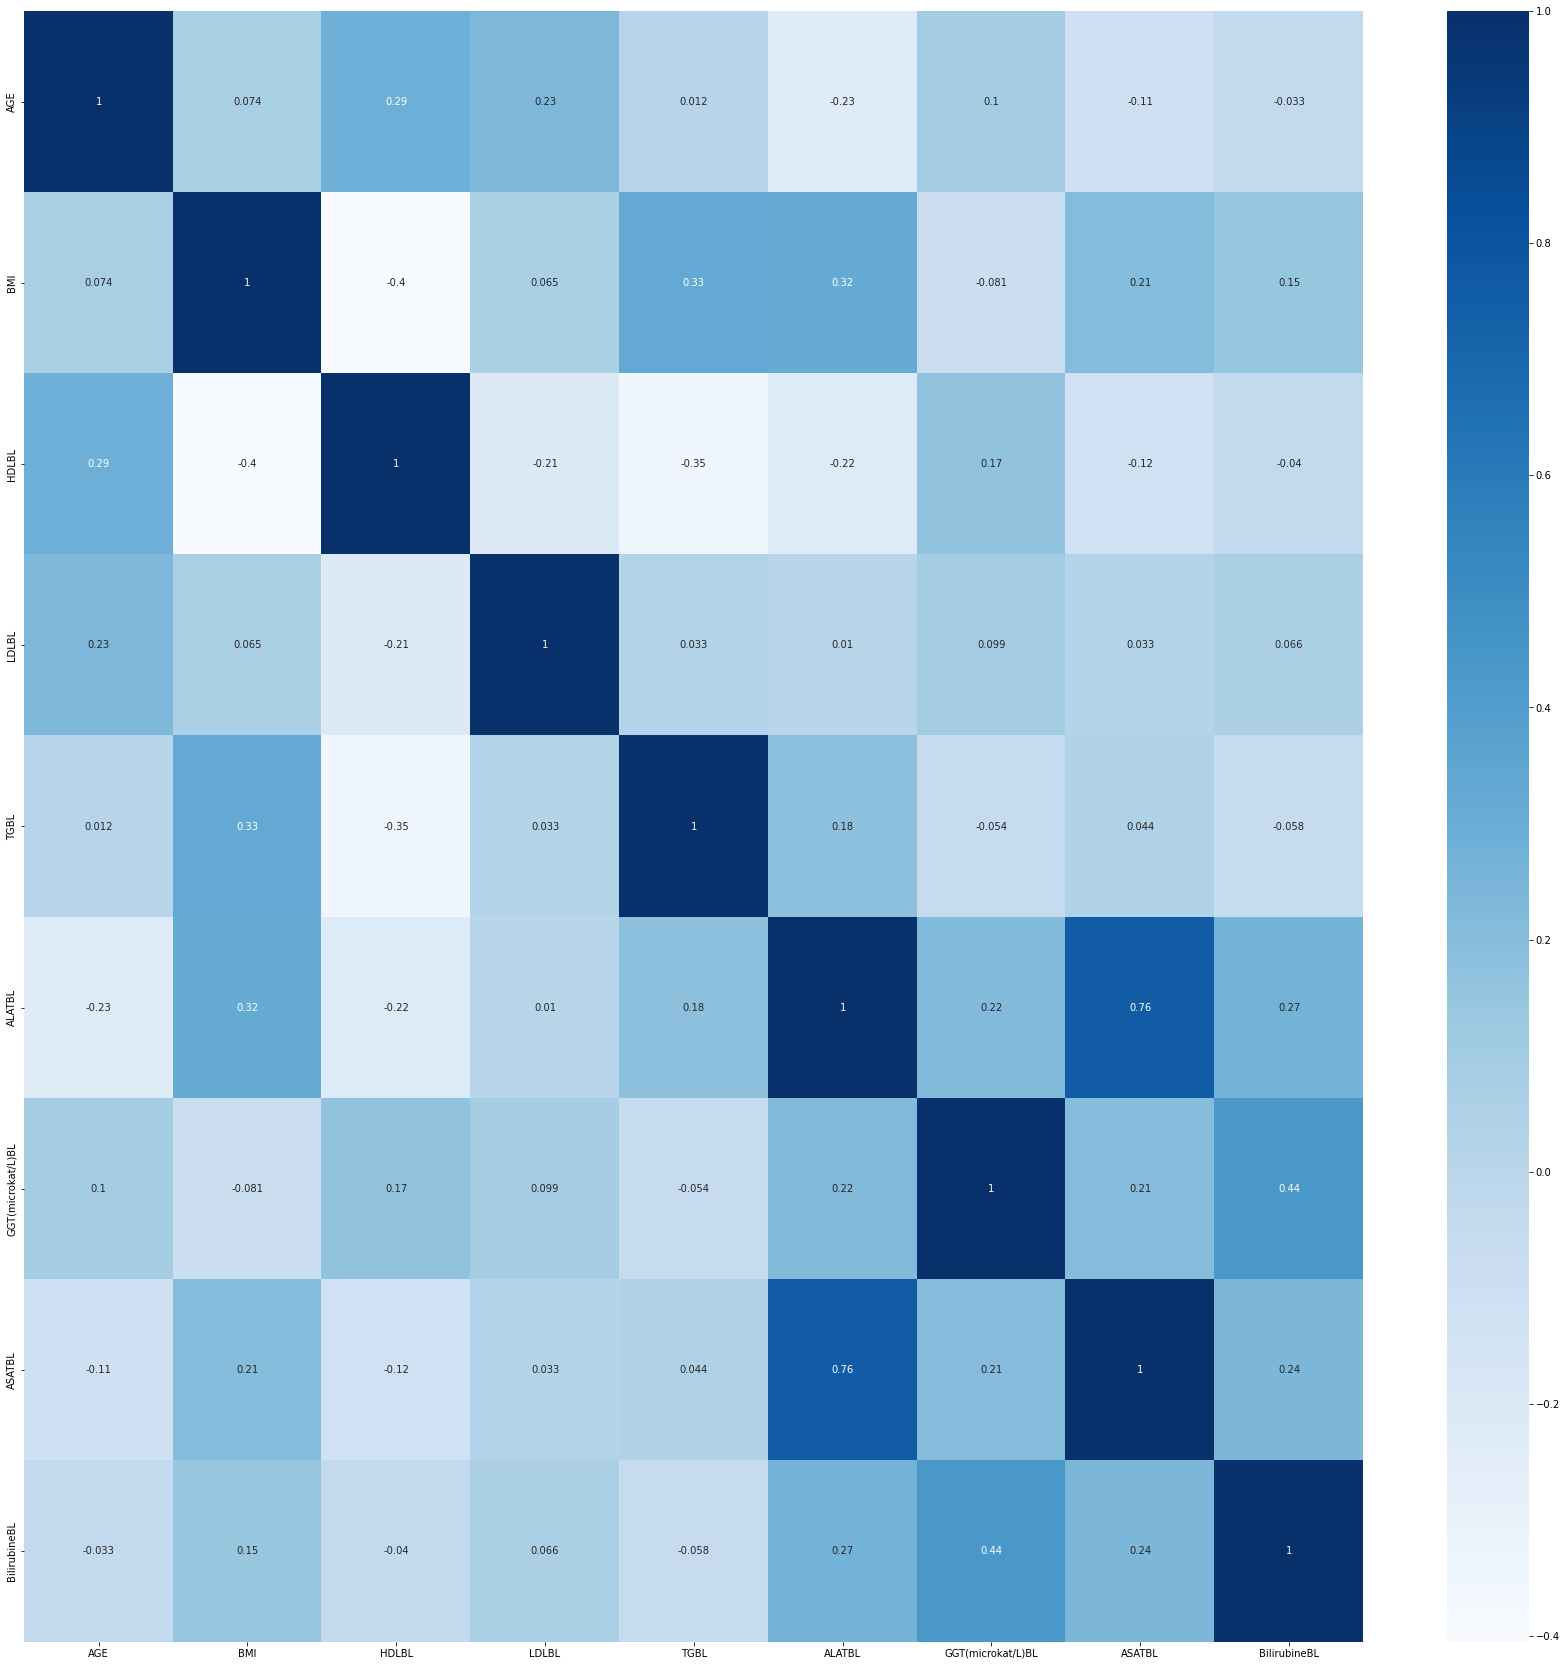

In [24]:
correl = df.corr()
f,ax=plt.subplots(figsize=(30,30))
sns.heatmap(correl,cmap="Blues",annot=True)